Import Libraries

In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()

Load DataSet

In [6]:
data = pd.read_csv('/content/drive/MyDrive/DataScienceProject/5G Time Series/Data Set/Quality of Service 5G.csv')

In [7]:
data.columns

Index(['Timestamp', 'User_ID', 'Application_Type', 'Signal_Strength',
       'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth',
       'Resource_Allocation'],
      dtype='object')

Display DataSet

In [8]:
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


Summary

In [9]:
data.describe().T

,count,unique,top,freq
Timestamp,400,7,9/3/2023 10:01,60
User_ID,400,400,User_1,1
Application_Type,400,11,Video_Call,58
Signal_Strength,400,84,-97 dBm,9
Latency,400,87,5 ms,35
Required_Bandwidth,400,188,0.1 Mbps,16
Allocated_Bandwidth,400,194,0.1 Mbps,16
Resource_Allocation,400,9,70%,148


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [11]:
data.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [12]:
data.size

3200

In [13]:
data.shape

(400, 8)

In [14]:
data['User_ID'].nunique()

400

Unique Values

In [15]:
data['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [16]:
data['Application_Type'].nunique()

11

In [17]:
data['Signal_Strength'].unique()

array(['-75 dBm', '-80 dBm', '-85 dBm', '-70 dBm', '-78 dBm', '-90 dBm',
       '-88 dBm', '-95 dBm', '-82 dBm', '-76 dBm', '-79 dBm', '-87 dBm',
       '-81 dBm', '-74 dBm', '-84 dBm', '-69 dBm', '-91 dBm', '-96 dBm',
       '-83 dBm', '-77 dBm', '-86 dBm', '-73 dBm', '-68 dBm', '-92 dBm',
       '-97 dBm', '-72 dBm', '-67 dBm', '-93 dBm', '-98 dBm', '-71 dBm',
       '-66 dBm', '-94 dBm', '-99 dBm', '-89 dBm', '-65 dBm', '-100 dBm',
       '-64 dBm', '-101 dBm', '-63 dBm', '-102 dBm', '-62 dBm',
       '-103 dBm', '-61 dBm', '-104 dBm', '-60 dBm', '-59 dBm', '-58 dBm',
       '-57 dBm', '-56 dBm', '-55 dBm', '-54 dBm', '-53 dBm', '-52 dBm',
       '-51 dBm', '-105 dBm', '-50 dBm', '-106 dBm', '-107 dBm',
       '-49 dBm', '-108 dBm', '-109 dBm', '-48 dBm', '-110 dBm',
       '-111 dBm', '-47 dBm', '-112 dBm', '-113 dBm', '-46 dBm',
       '-114 dBm', '-115 dBm', '-45 dBm', '-116 dBm', '-44 dBm',
       '-117 dBm', '-118 dBm', '-43 dBm', '-119 dBm', '-42 dBm',
       '-120 dBm', '-121

In [18]:
data['Signal_Strength'].nunique()

84

In [19]:
data['Latency'].unique()

array(['30 ms', '20 ms', '40 ms', '10 ms', '25 ms', '50 ms', '100 ms',
       '35 ms', '45 ms', '32 ms', '24 ms', '28 ms', '22 ms', '29 ms',
       '38 ms', '9 ms', '48 ms', '105 ms', '34 ms', '31 ms', '23 ms',
       '21 ms', '37 ms', '8 ms', '47 ms', '110 ms', '33 ms', '27 ms',
       '36 ms', '7 ms', '46 ms', '26 ms', '104 ms', '103 ms', '102 ms',
       '19 ms', '6 ms', '44 ms', '101 ms', '18 ms', '43 ms', '17 ms',
       '42 ms', '99 ms', '5 ms', '49 ms', '51 ms', '52 ms', '53 ms',
       '54 ms', '55 ms', '56 ms', '39 ms', '16 ms', '57 ms', '15 ms',
       '58 ms', '41 ms', '14 ms', '59 ms', '13 ms', '60 ms', '12 ms',
       '61 ms', '11 ms', '62 ms', '63 ms', '64 ms', '65 ms', '66 ms',
       '67 ms', '68 ms', '4 ms', '69 ms', '3 ms', '70 ms', '2 ms',
       '71 ms', '1 ms', '72 ms', '0 ms', '73 ms', '74 ms', '75 ms',
       '76 ms', '77 ms', '78 ms'], dtype=object)

In [20]:
data['Latency'].nunique()

87

In [21]:
data['Resource_Allocation'].unique()

array(['70%', '80%', '75%', '90%', '85%', '60%', '50%', '65%', '55%'],
      dtype=object)

Regex Cleaning

In [22]:
data['Signal_Strength'] = data['Signal_Strength'].str.extract('(\d+)').astype(int)
data['Latency'] = data['Latency'].str.extract('(\d+)').astype(int)
data['Resource_Allocation'] = data['Resource_Allocation'].str.extract('(\d+)').astype(int)

In [23]:
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80
2,9/3/2023 10:00,User_3,Streaming,85,40,5 Mbps,6 Mbps,75
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,1 Mbps,1.5 Mbps,90
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,2 Mbps,3 Mbps,85


In [24]:
data[['Size','Unit']] = data.Required_Bandwidth.str.split(' ', expand=True)

In [25]:
data['Size'] = data.Size.astype(float)

In [26]:
data.Unit.replace({'Mbps':1024, 'Kbps':1}, inplace=True)

In [27]:
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Size,Unit
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10.0,1024
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80,100.0,1
2,9/3/2023 10:00,User_3,Streaming,85,40,5 Mbps,6 Mbps,75,5.0,1024
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,1 Mbps,1.5 Mbps,90,1.0,1024
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,2 Mbps,3 Mbps,85,2.0,1024


In [28]:
data['Required_Bandwidth_Size_in_KB'] = data.Size * data.Unit

In [29]:
data.head(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Size,Unit,Required_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10.0,1024,10240.0


In [30]:
data.drop(columns='Size',inplace=True)
data.drop(columns='Unit',inplace=True)

In [31]:
data.head(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Required_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10240.0


Converting Allocated_Bandwidth Unit from Mbps to Kbps

In [32]:
data[['Size1','Unit1']] = data.Allocated_Bandwidth.str.split(' ', expand=True)

In [33]:
data['Size1'] = data.Size1.astype(float)

In [34]:
data.Unit1.replace({'Mbps':1024, 'Kbps':1}, inplace=True)

In [35]:
data['Allocated_Bandwidth_Size_in_KB'] = data.Size1 * data.Unit1

In [36]:
data.head(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Required_Bandwidth_Size_in_KB,Size1,Unit1,Allocated_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10240.0,15.0,1024,15360.0


In [37]:
data.drop(columns='Size1',inplace=True)
data.drop(columns='Unit1',inplace=True)

In [38]:
data.head(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Required_Bandwidth_Size_in_KB,Allocated_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10240.0,15360.0


In [39]:
data.drop(columns='Allocated_Bandwidth',inplace=True)
data.drop(columns='Required_Bandwidth',inplace=True)

In [40]:
data.head(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth_Size_in_KB,Allocated_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0


In [41]:
data.rename(columns = {'Required_Bandwidth_Size_in_KB':'Required_Bandwidth'},inplace=True)

In [42]:
data.rename(columns = {'Allocated_Bandwidth_Size_in_KB':'Allocated_Bandwidth'},inplace=True)

In [43]:
data.head(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0


 Online Gaming with least avg bandwidth requirement

In [44]:
new_data_Online_Gaming = data[data['Application_Type']=='Online_Gaming']

In [45]:
sorted_Online_Gaming = new_data_Online_Gaming.sort_values(by='Required_Bandwidth')

In [46]:
sorted_Online_Gaming.tail(1)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
394,9/3/2023 10:06,User_395,Online_Gaming,41,47,80,6451.2,6758.4


In [47]:
data['Timestamp'].nunique()

7

User with high Required_Bandwidth User with high signal strength

In [48]:
data.Signal_Strength.max()

123

In [49]:
data.query("Signal_Strength == 123")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
392,9/3/2023 10:06,User_393,Background_Download,123,78,60,350.0,350.0


In [50]:
data.Required_Bandwidth.max()

14848.0

In [51]:
data.query("Required_Bandwidth == 14848")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
396,9/3/2023 10:06,User_397,Video_Call,40,53,75,14848.0,16179.2


User with high Allocated_Bandwidth

In [52]:
data.Allocated_Bandwidth.max()

16179.2

In [53]:
data.query("Allocated_Bandwidth == 16179.2")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
396,9/3/2023 10:06,User_397,Video_Call,40,53,75,14848.0,16179.2


User with high Latency

In [54]:
data.Latency.max()

110

In [55]:
data.query("Latency == 110")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
28,9/3/2023 10:00,User_29,IoT_Temperature,97,110,65,7.0,8.0


 Average of signal strength on diffrent application

In [56]:
app_signsl_strength = data.groupby(['Application_Type'])['Signal_Strength'].mean()

maximum average of signal strength on diffrent application

In [57]:
app_signsl_strength.nlargest()

Application_Type
Background_Download    104.063830
IoT_Temperature        100.230769
Web_Browsing            99.791667
Video_Streaming         93.936170
Streaming               89.617021
Name: Signal_Strength, dtype: float64

Minimum average of signal strength on diffrent application

In [58]:
app_signsl_strength.nsmallest()

Application_Type
Emergency_Service    53.829787
Online_Gaming        62.155556
Video_Call           62.396552
File_Download        75.000000
VoIP_Call            75.782609
Name: Signal_Strength, dtype: float64

Average of latency on diffrent application

In [59]:
app_Latency = data.groupby(['Application_Type'])['Latency'].mean()

maximum average of latency on diffrent application

In [60]:
app_Latency.nlargest()

Application_Type
IoT_Temperature        102.153846
Background_Download     56.978723
File_Download           45.000000
Streaming               41.851064
Video_Streaming         38.851064
Name: Latency, dtype: float64

 minimum average of latency on diffrent application

In [61]:
app_Latency.nsmallest()

Application_Type
Emergency_Service     5.574468
Web_Browsing         15.562500
Voice_Call           20.000000
Online_Gaming        29.111111
VoIP_Call            31.304348
Name: Latency, dtype: float64

In [62]:
data.groupby(['Application_Type'])['Latency'].mean()

Application_Type
Background_Download     56.978723
Emergency_Service        5.574468
File_Download           45.000000
IoT_Temperature        102.153846
Online_Gaming           29.111111
Streaming               41.851064
Video_Call              32.879310
Video_Streaming         38.851064
VoIP_Call               31.304348
Voice_Call              20.000000
Web_Browsing            15.562500
Name: Latency, dtype: float64

Average of resource_Allocation on diffrent application

In [63]:
app_Resource_Allocation = data.groupby(['Application_Type'])['Resource_Allocation'].mean()

maximum average of latency on diffrent application

In [64]:
app_Resource_Allocation.nlargest()

Application_Type
VoIP_Call        89.891304
Streaming        84.468085
Online_Gaming    80.000000
Voice_Call       80.000000
Video_Call       74.482759
Name: Resource_Allocation, dtype: float64

minimum average of latency on diffrent application

In [65]:
app_Resource_Allocation.nsmallest()

Application_Type
Background_Download    60.106383
Web_Browsing           69.687500
File_Download          70.000000
Video_Streaming        70.319149
IoT_Temperature        70.384615
Name: Resource_Allocation, dtype: float64

Average of resource_Allocation on diffrent Timestamp

In [66]:
timestamp_Resource = data.groupby(['Timestamp'])['Resource_Allocation'].mean()

In [67]:
timestamp_Resource.nlargest()

Timestamp
9/3/2023 10:03    75.166667
9/3/2023 10:05    75.166667
9/3/2023 10:01    75.083333
9/3/2023 10:04    74.833333
9/3/2023 10:06    74.800000
Name: Resource_Allocation, dtype: float64

In [68]:
timestamp_Resource.nsmallest()

Timestamp
9/3/2023 10:00    73.000000
9/3/2023 10:02    74.666667
9/3/2023 10:06    74.800000
9/3/2023 10:04    74.833333
9/3/2023 10:01    75.083333
Name: Resource_Allocation, dtype: float64

In [69]:
timestamp_Latency = data.groupby(['Timestamp'])['Latency'].mean()

In [70]:
timestamp_Latency

Timestamp
9/3/2023 10:00    36.500000
9/3/2023 10:01    33.116667
9/3/2023 10:02    28.500000
9/3/2023 10:03    28.483333
9/3/2023 10:04    32.750000
9/3/2023 10:05    38.250000
9/3/2023 10:06    40.780000
Name: Latency, dtype: float64

 **VISUALISATION**

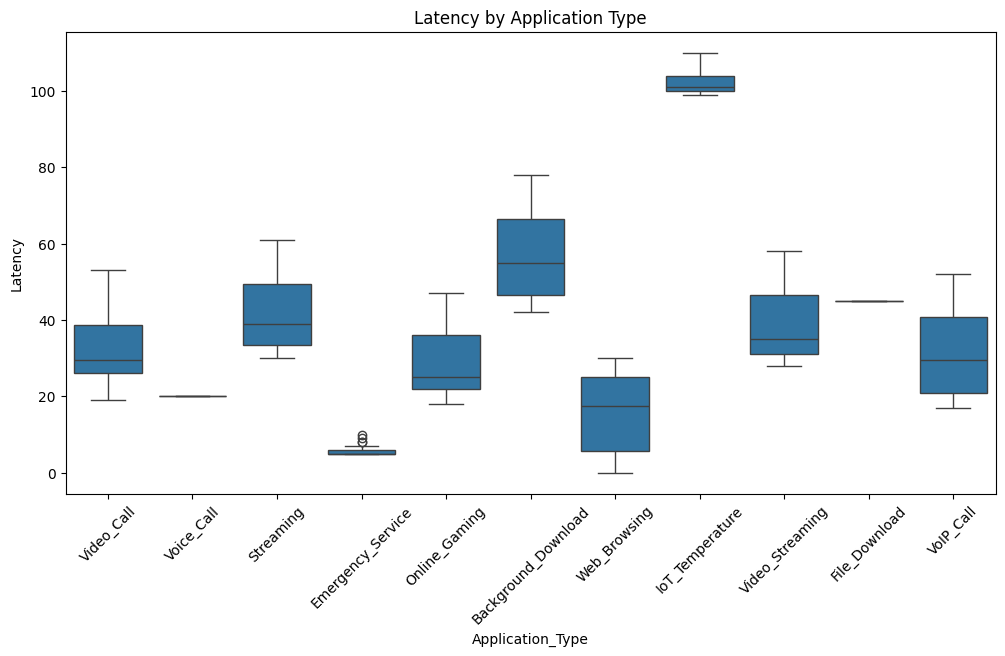

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Latency', data=data)
plt.title('Latency by Application Type')
plt.xticks(rotation=45)
plt.show()

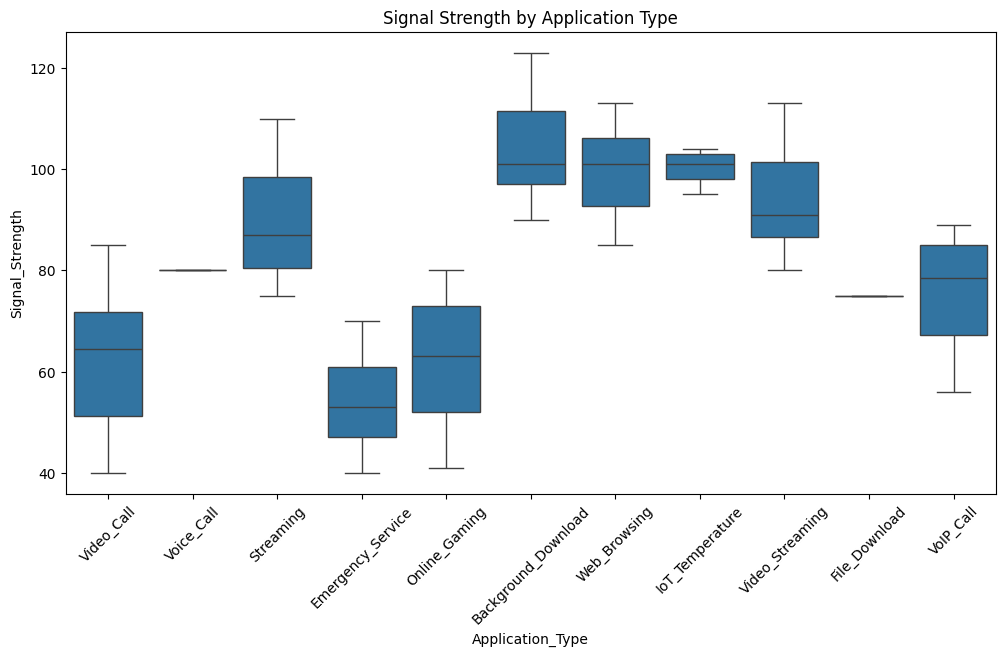

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Signal_Strength', data=data)
plt.title('Signal Strength by Application Type')
plt.xticks(rotation=45)
plt.show()

In [73]:
data_sorted = data.sort_values(by='Required_Bandwidth')

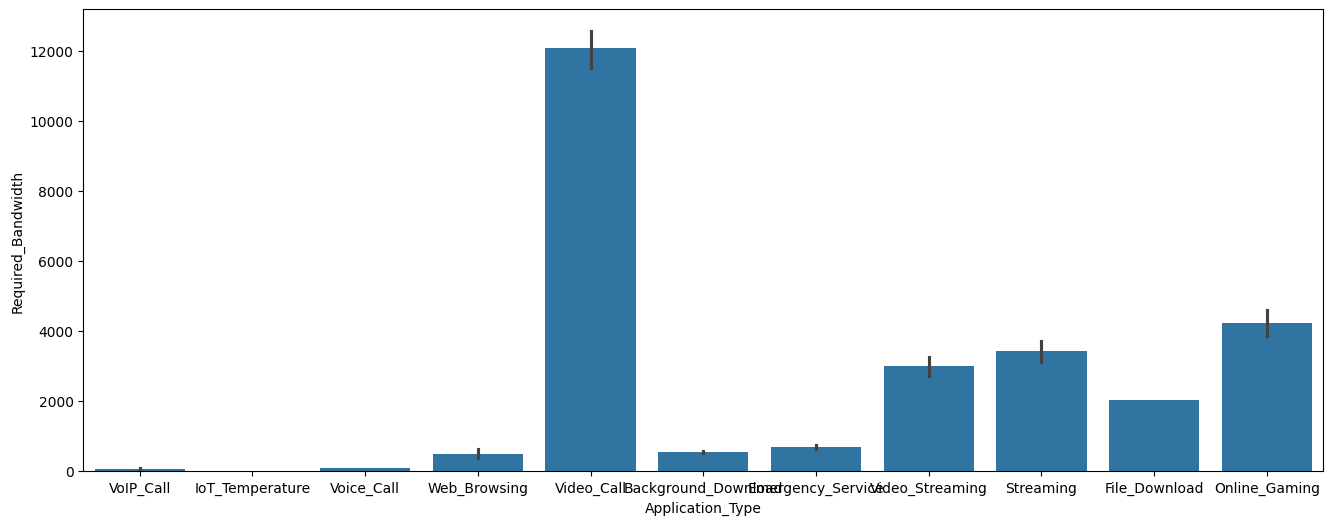

In [74]:
plt.figure(figsize=(16, 6))
sns.barplot(data=data_sorted, x= 'Application_Type', y = 'Required_Bandwidth')
plt.show()

<Axes: xlabel='Resource_Allocation', ylabel='count'>

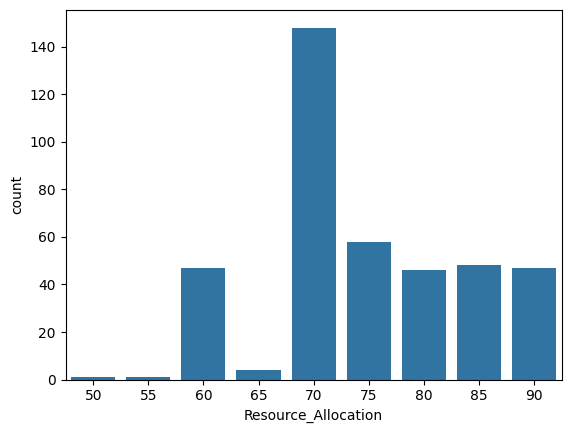

In [75]:
sns.countplot(x=data['Resource_Allocation'])

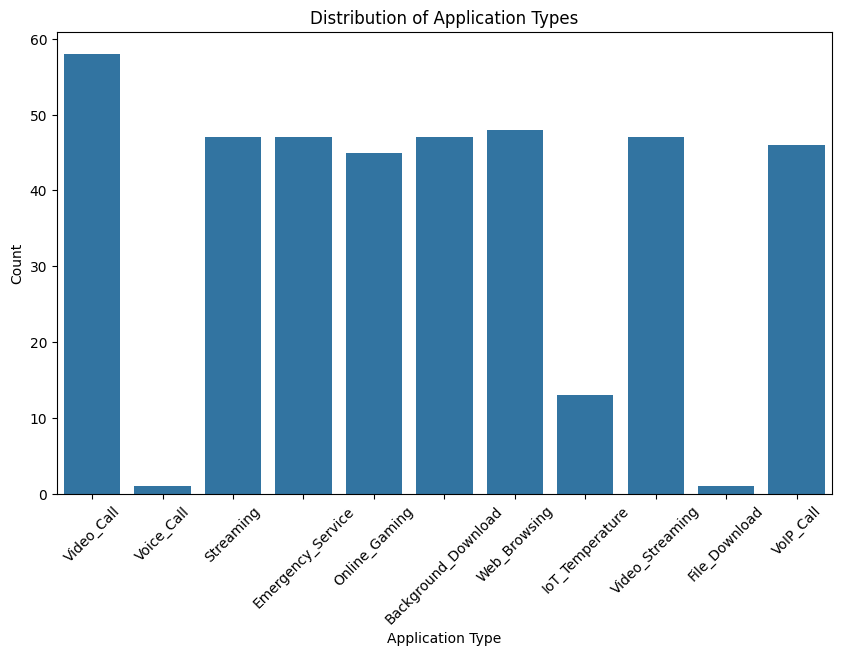

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Application_Type')
plt.title('Distribution of Application Types')
plt.xticks(rotation=45)
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.show()

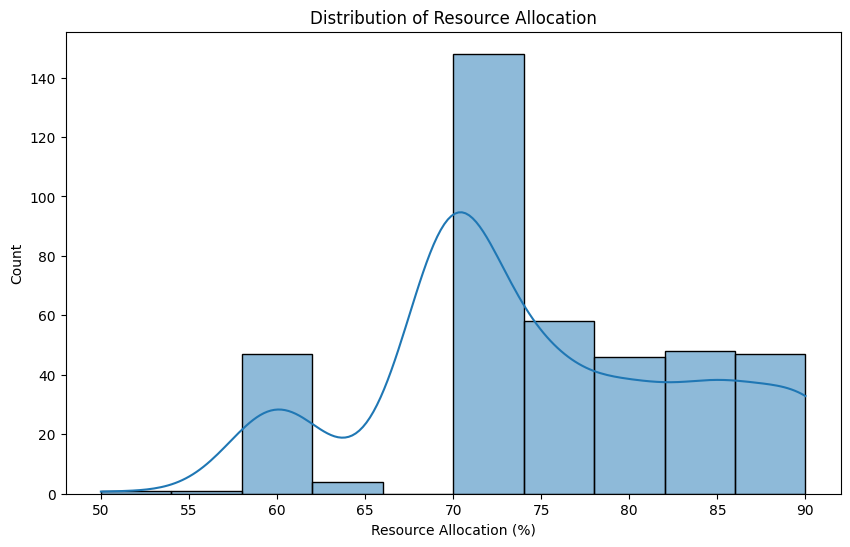

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Resource_Allocation', bins=10 ,kde=True)
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation (%)')
plt.ylabel('Count')
plt.show()

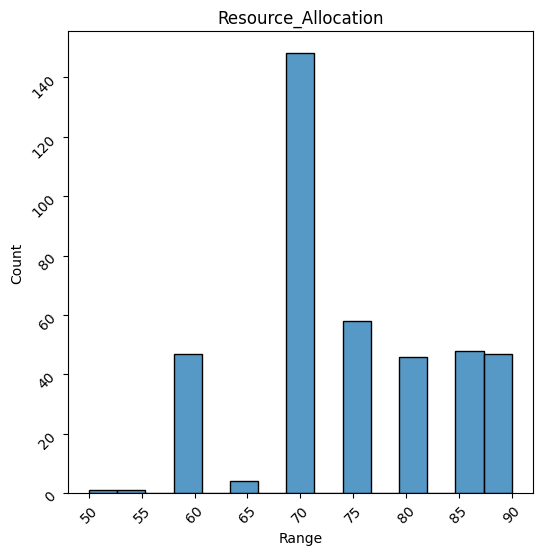

In [78]:
plt.figure(figsize=(6,6))
plt.title('Resource_Allocation')
plt.xlabel('Range')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
sns.histplot(data=data, x='Resource_Allocation')
plt.show()

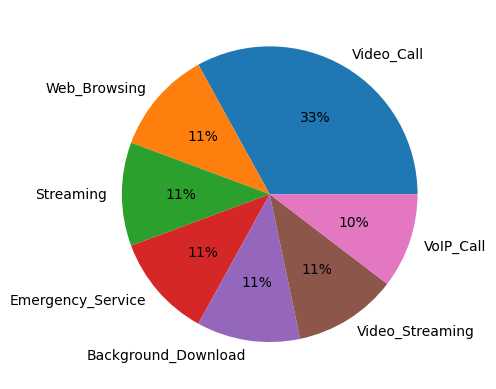

In [79]:
app_name  =data.Application_Type.value_counts().index
lat_val = data.Latency.value_counts().values
plt.pie(lat_val[:7],labels = app_name[:7],autopct='%1.f%%');

In [80]:
data.head(1)


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0


In [81]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            400 non-null    object 
 1   User_ID              400 non-null    object 
 2   Application_Type     400 non-null    object 
 3   Signal_Strength      400 non-null    int64  
 4   Latency              400 non-null    int64  
 5   Resource_Allocation  400 non-null    int64  
 6   Required_Bandwidth   400 non-null    float64
 7   Allocated_Bandwidth  400 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 25.1+ KB


In [82]:
data.Timestamp.unique()


array(['9/3/2023 10:00', '9/3/2023 10:01', '9/3/2023 10:02',
       '9/3/2023 10:03', '9/3/2023 10:04', '9/3/2023 10:05',
       '9/3/2023 10:06'], dtype=object)

In [83]:
ts1=data.query("Timestamp =='9/3/2023 10:00'")
ts1.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,80,100.0,120.0
2,9/3/2023 10:00,User_3,Streaming,85,40,75,5120.0,6144.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,90,1024.0,1536.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,85,2048.0,3072.0


In [84]:
ts1pie = ts1.groupby(['Application_Type'])['Application_Type'].count().reset_index(name='type_count')
ts1pie

,Application_Type,type_count
0,Background_Download,5
1,Emergency_Service,5
2,File_Download,1
3,IoT_Temperature,5
4,Online_Gaming,5
5,Streaming,5
6,Video_Call,9
7,Video_Streaming,5
8,VoIP_Call,4
9,Voice_Call,1


In [85]:
ts1pie.type_count


0     5
1     5
2     1
3     5
4     5
5     5
6     9
7     5
8     4
9     1
10    5
Name: type_count, dtype: int64

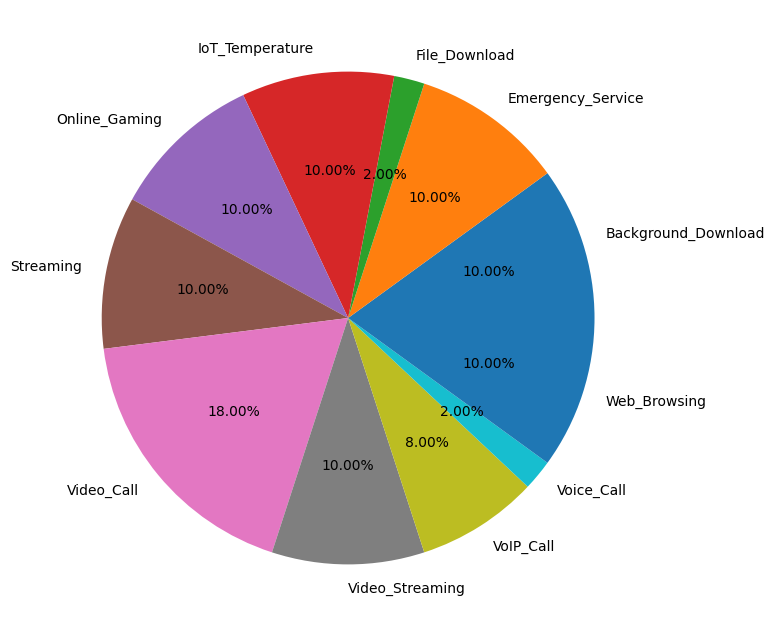

In [86]:
plt.figure(figsize=(12,8))
plt.pie(ts1pie.type_count.values,labels = ts1pie.Application_Type.values,autopct='%1.2f%%');

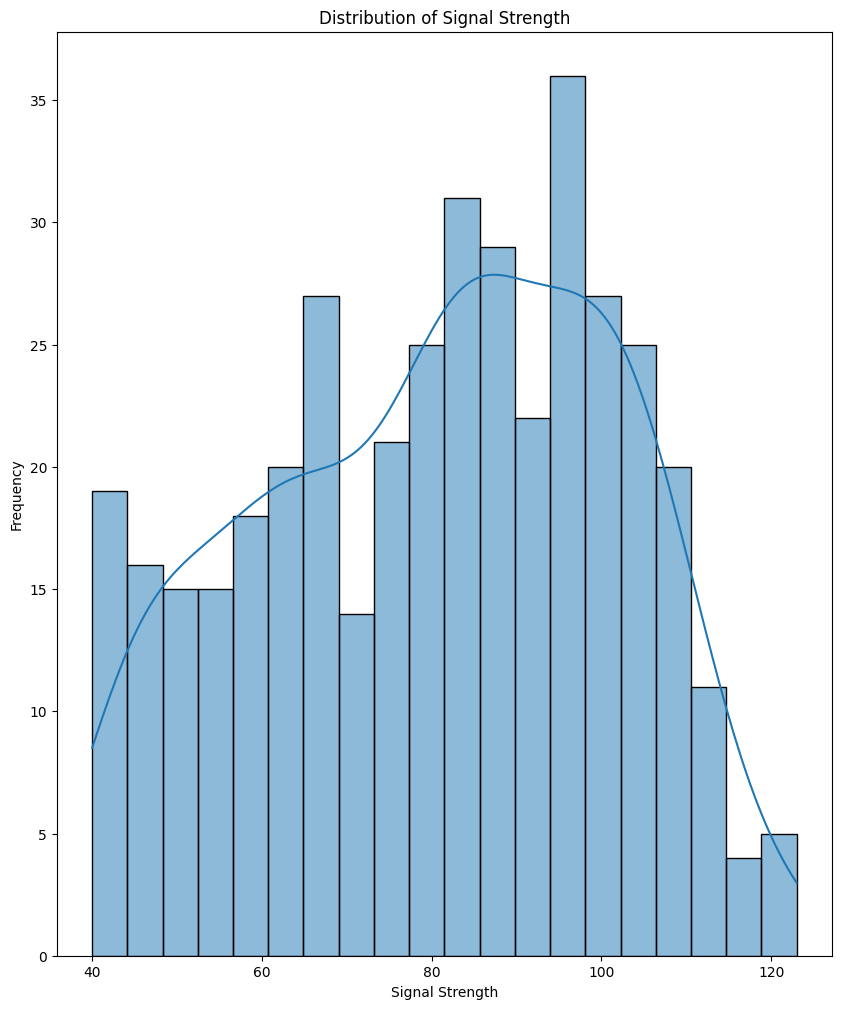

In [87]:
plt.figure(figsize=(10, 12))
sns.histplot(data=data, x='Signal_Strength', bins=20, kde=True)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

In [88]:
application_counts = data['Application_Type'].value_counts()
application_counts

Application_Type
Video_Call             58
Web_Browsing           48
Streaming              47
Emergency_Service      47
Background_Download    47
Video_Streaming        47
VoIP_Call              46
Online_Gaming          45
IoT_Temperature        13
Voice_Call              1
File_Download           1
Name: count, dtype: int64

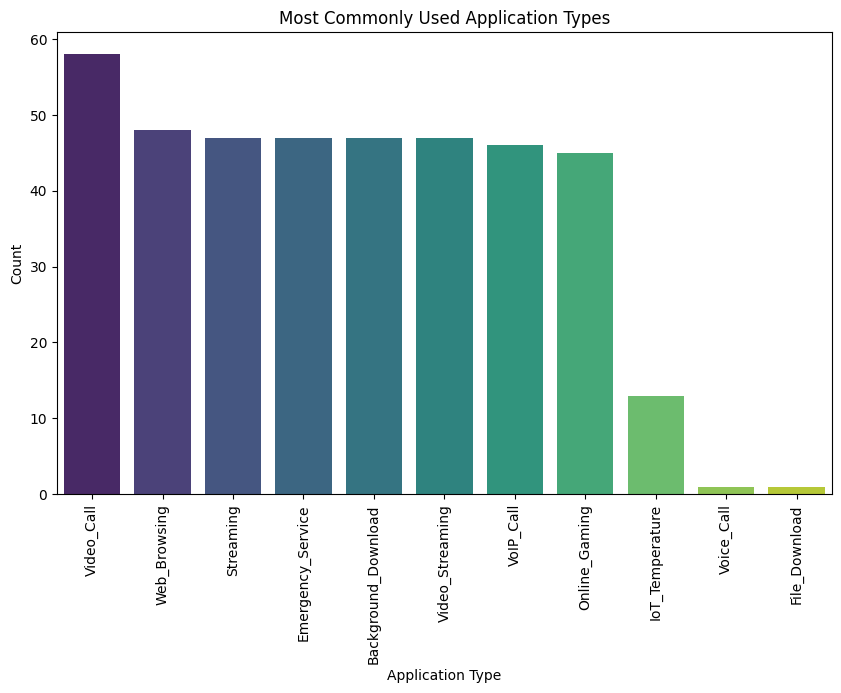

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x=application_counts.index, y=application_counts.values, palette="viridis")
plt.title('Most Commonly Used Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

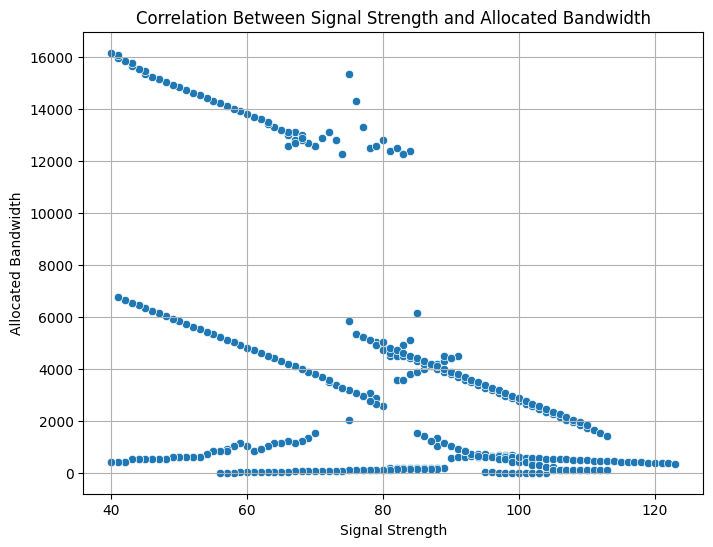

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Signal_Strength', y='Allocated_Bandwidth',)
plt.title('Correlation Between Signal Strength and Allocated Bandwidth')
plt.xlabel('Signal Strength')
plt.ylabel('Allocated Bandwidth')
plt.grid(True)
plt.show()

In [91]:
correlation_coefficient = data['Signal_Strength'].corr(data['Allocated_Bandwidth'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.44728878034938635


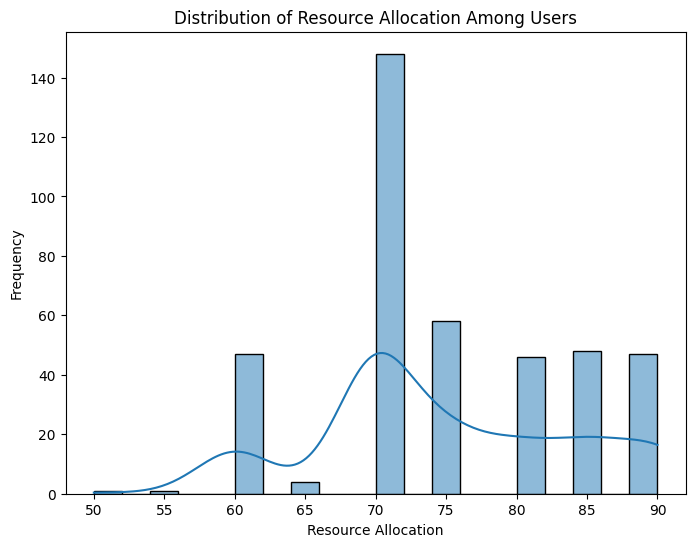

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Resource_Allocation', bins=20, kde=True)
plt.title('Distribution of Resource Allocation Among Users')
plt.xlabel('Resource Allocation')
plt.ylabel('Frequency')
plt.show()

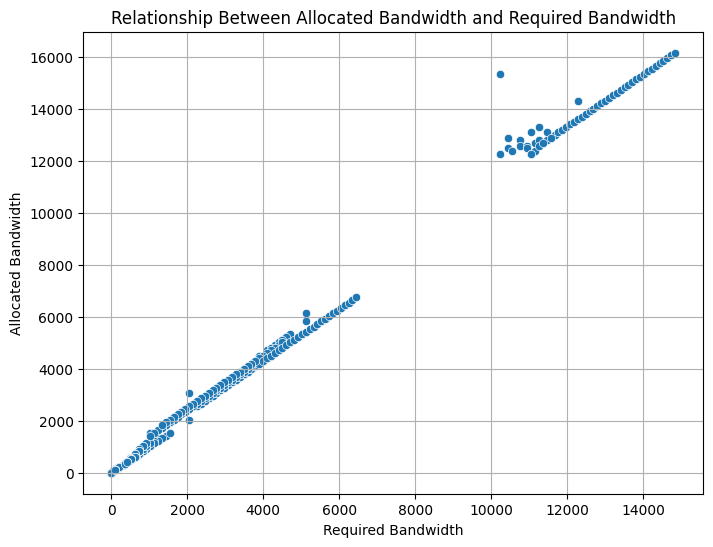

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Required_Bandwidth', y='Allocated_Bandwidth')
plt.title('Relationship Between Allocated Bandwidth and Required Bandwidth')
plt.xlabel('Required Bandwidth')
plt.ylabel('Allocated Bandwidth')
plt.grid(True)
plt.show()

In [96]:
correlation_coefficient = data['Allocated_Bandwidth'].corr(data['Required_Bandwidth'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.9981823984546992


Matplotlib

In [97]:
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,80,100.0,120.0
2,9/3/2023 10:00,User_3,Streaming,85,40,75,5120.0,6144.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,90,1024.0,1536.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,85,2048.0,3072.0


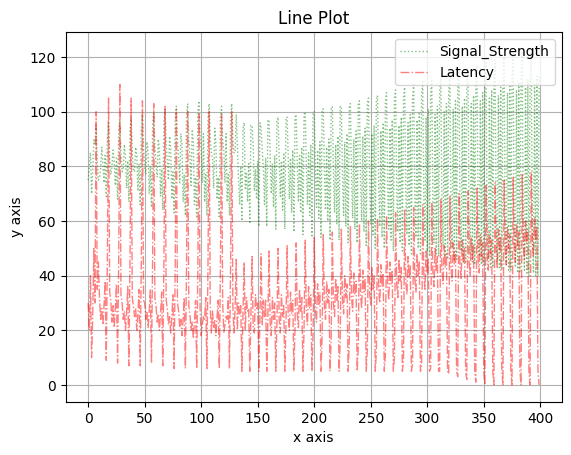

In [98]:
data.Signal_Strength.plot(kind = 'line', color = 'g',label = 'Signal_Strength',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Latency.plot(color = 'r',label = 'Latency',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

Text(0.5, 1.0, 'Signal Strength vs Latency Scatter Plot')

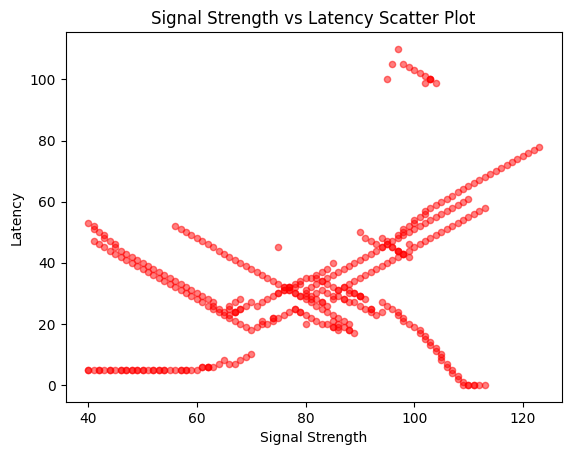

In [99]:
data.plot(kind='scatter', x='Signal_Strength', y='Latency',alpha = 0.5,color = 'red')
plt.xlabel('Signal Strength')
plt.ylabel('Latency')
plt.title('Signal Strength vs Latency Scatter Plot')

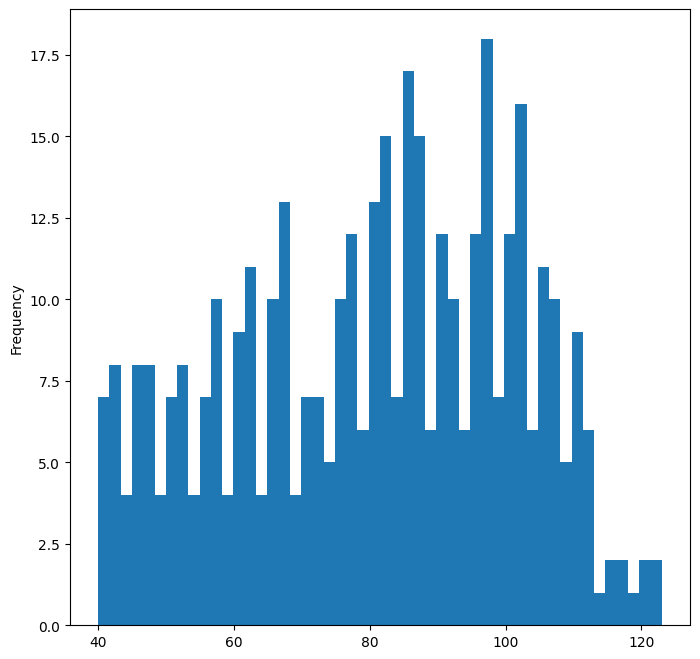

In [102]:
data.Signal_Strength.plot(kind = 'hist',bins = 50,figsize = (8,8))
plt.show()

In [103]:
x = data['Signal_Strength']>20
data[x]

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,80,100.0,120.0
2,9/3/2023 10:00,User_3,Streaming,85,40,75,5120.0,6144.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,90,1024.0,1536.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,85,2048.0,3072.0
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,110,61,85,1331.2,1843.2
396,9/3/2023 10:06,User_397,Video_Call,40,53,75,14848.0,16179.2
397,9/3/2023 10:06,User_398,Video_Streaming,113,58,70,1024.0,1433.6
398,9/3/2023 10:06,User_399,Emergency_Service,40,5,70,409.6,409.6


In [104]:
data[np.logical_and(data['Signal_Strength']>20, data['Latency']<10 )]


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
16,9/3/2023 10:00,User_17,Emergency_Service,69,9,80,1228.8,1331.2
26,9/3/2023 10:00,User_27,Emergency_Service,68,8,70,1126.4,1228.8
36,9/3/2023 10:00,User_37,Emergency_Service,67,7,70,1024.0,1126.4
46,9/3/2023 10:00,User_47,Emergency_Service,66,7,70,1126.4,1228.8
56,9/3/2023 10:01,User_57,Emergency_Service,65,8,70,1024.0,1126.4
...,...,...,...,...,...,...,...,...
383,9/3/2023 10:06,User_384,Web_Browsing,111,0,70,102.4,102.4
390,9/3/2023 10:06,User_391,Emergency_Service,40,5,70,409.6,409.6
391,9/3/2023 10:06,User_392,Web_Browsing,112,0,70,102.4,102.4
398,9/3/2023 10:06,User_399,Emergency_Service,40,5,70,409.6,409.6


In [105]:
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [106]:
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5



In [107]:
for index, value in enumerate(lis):
    print(index," : ",value)
print('')

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5



In [108]:
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

spain  :  madrid
france  :  paris



In [109]:
for index,value in data[['Signal_Strength']][0:10].iterrows():
    print(index," : ",value)

0  :  Signal_Strength    75
Name: 0, dtype: int64
1  :  Signal_Strength    80
Name: 1, dtype: int64
2  :  Signal_Strength    85
Name: 2, dtype: int64
3  :  Signal_Strength    70
Name: 3, dtype: int64
4  :  Signal_Strength    78
Name: 4, dtype: int64
5  :  Signal_Strength    90
Name: 5, dtype: int64
6  :  Signal_Strength    88
Name: 6, dtype: int64
7  :  Signal_Strength    95
Name: 7, dtype: int64
8  :  Signal_Strength    82
Name: 8, dtype: int64
9  :  Signal_Strength    75
Name: 9, dtype: int64


In [110]:
x = 2
def f():
    x = 3
    return x
print(x)
print(f())

2
3


 Signal scope

In [111]:
x = 5
def f():
    y = 2*x
    return y
print(f())

10


In [112]:
def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square())

25


In [113]:
square = lambda x: x**2
print(square(4))
tot = lambda x,y,z: x+y+z
print(tot(1,2,3))

16
6


In [114]:
name = "AMCT 2023-2024"
it = iter(name)
print(next(it))
print(next(it))
print(next(it))
print(*it)

A
M
C
T   2 0 2 3 - 2 0 2 4


In [115]:
num1 = [1,2,3]
num2 = [i + 1 for i in num1]
print(num2)

[2, 3, 4]


In [116]:
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [117]:
threshold = sum(data.Signal_Strength)/len(data.Signal_Strength)
data["Signal Strength Level"] = ["high" if i > threshold else "low" for i in data.Signal_Strength]

In [118]:
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth,Signal Strength Level
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0,low
1,9/3/2023 10:00,User_2,Voice_Call,80,20,80,100.0,120.0,low
2,9/3/2023 10:00,User_3,Streaming,85,40,75,5120.0,6144.0,high
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,90,1024.0,1536.0,low
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,85,2048.0,3072.0,low


In [119]:
data.loc[:10,["Signal Strength Level","Signal_Strength"]]

,Signal Strength Level,Signal_Strength
0,low,75
1,low,80
2,high,85
3,low,70
4,low,78
5,high,90
6,high,88
7,high,95
8,high,82
9,low,75


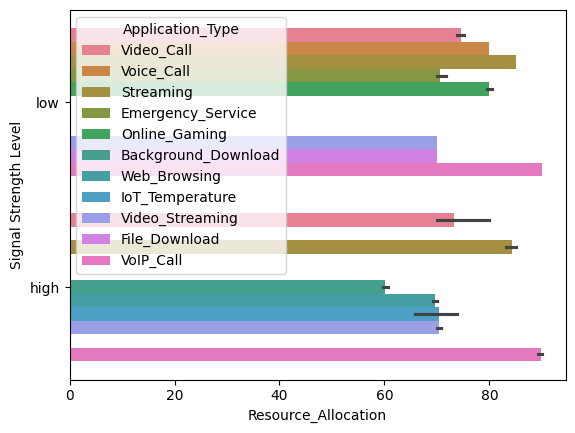

In [120]:
sns.barplot(x="Resource_Allocation", y="Signal Strength Level", hue="Application_Type", data=data);

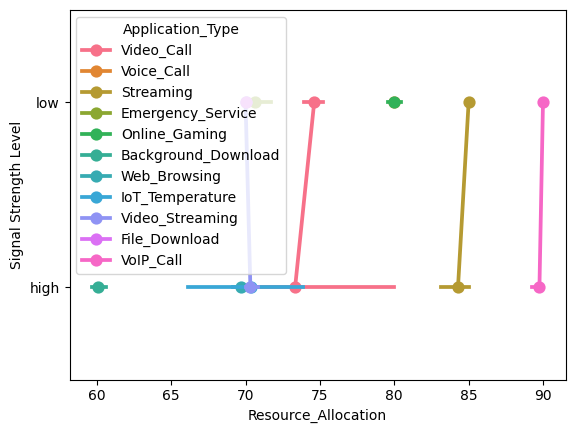

In [121]:
sns.pointplot(x="Resource_Allocation", y="Signal Strength Level", hue="Application_Type", data=data);

In [122]:
data_new = data
data_new['Application_Type'] = label_encoder.fit_transform(data_new['Application_Type'])

In [123]:
data_new.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth,Signal Strength Level
0,9/3/2023 10:00,User_1,6,75,30,70,10240.0,15360.0,low
1,9/3/2023 10:00,User_2,9,80,20,80,100.0,120.0,low
2,9/3/2023 10:00,User_3,5,85,40,75,5120.0,6144.0,high
3,9/3/2023 10:00,User_4,1,70,10,90,1024.0,1536.0,low
4,9/3/2023 10:00,User_5,4,78,25,85,2048.0,3072.0,low


In [124]:
data_new['Signal Strength Level'] = label_encoder.fit_transform(data_new['Signal Strength Level'])
data_new['Timestamp'] = label_encoder.fit_transform(data_new['Timestamp'])
data_new['User_ID'] = label_encoder.fit_transform(data_new['User_ID'])

In [125]:
data_new.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth,Signal Strength Level
0,0,0,6,75,30,70,10240.0,15360.0,1
1,0,111,9,80,20,80,100.0,120.0,1
2,0,222,5,85,40,75,5120.0,6144.0,0
3,0,333,1,70,10,90,1024.0,1536.0,1
4,0,345,4,78,25,85,2048.0,3072.0,1


In [126]:
enc = OneHotEncoder(drop='first')
data_new2 = data
enc_app = pd.DataFrame(enc.fit_transform(data[['Application_Type']]).toarray())
data_new2 = data_new2.join(enc_app)

In [127]:
data_new2.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth,Signal Strength Level,0,1,2,3,4,5,6,7,8,9
0,0,0,6,75,30,70,10240.0,15360.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,111,9,80,20,80,100.0,120.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,222,5,85,40,75,5120.0,6144.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,333,1,70,10,90,1024.0,1536.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,345,4,78,25,85,2048.0,3072.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
data_new2.drop(data_new2.iloc[:, 9:], inplace=True, axis=1)

Split Train and Test

In [131]:
from sklearn.model_selection import train_test_split

X_all = data_new2.drop(['Signal_Strength', 'Signal Strength Level'], axis=1)
y_all = data_new2['Signal Strength Level']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=3,
                       n_estimators=6)

In [133]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.975


K-Fold Validation

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=None)

result = cross_val_score(clf , X_train, y_train, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9625


In [135]:
ids = X_test['User_ID']
output = pd.DataFrame({ 'User_ID' : ids, 'Signal Strength Level': predictions })
output.head()

,User_ID,Signal Strength Level
133,39,1
331,259,0
167,76,0
335,263,0
239,157,0
